<h1>Analyzing Gun Deaths in the United States (2012–2014)</h1>

This study analyzes gun deaths in the United States of America between
2012 and 2014.
   #####  This case study will try to answer the following questions:
    • What is the number of annual suicide gun deaths in the United States from 2012 to 2014, by gender?
    • What is the number of gun deaths by race in the United States per 100,000 people from 2012 to 2014?
    • What is the annual number of gun deaths in the United States on average from 2012 to 2014, by cause?
    • What is the percentage per 100,000 people of annual gun deaths in the United States from 2012 to 2014,by
      cause?
    • What is the percentage of annual suicide gun deaths in the United States from 2012 to 2014, by year?

In [159]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(context='notebook',style='darkgrid', color_codes=True, palette='deep', font_scale=1)
%matplotlib inline

### Import Dataset

In [160]:
dataset = pd.read_csv('data/guns-data.csv', index_col=0)
dataset.index_name='index'
dataset.columns = map(str.capitalize, dataset.columns)
print(dataset.shape)
dataset.head()

(100798, 10)


,Year,Month,Intent,Police,Sex,Age,Race,Hispanic,Place,Education
1,2012,1,Suicide,0,M,34.0,Asian/Pacific Islander,100,Home,BA+
2,2012,1,Suicide,0,F,21.0,White,100,Street,Some college
3,2012,1,Suicide,0,M,60.0,White,100,Other specified,BA+
4,2012,2,Suicide,0,M,64.0,White,100,Home,BA+
5,2012,2,Suicide,0,M,31.0,White,100,Other specified,HS/GED


#### Organize the dataset by year and month

In [161]:
dataset_gun = dataset
dataset_gun.sort_values(['Year', 'Month'], inplace=True)


# Analysis

How many males and females are included in this
study?

In [162]:
dataset_gun.Sex.value_counts(normalize=False)

M    86349
F    14449
Name: Sex, dtype: int64

How many educated females are included in this
study?

In [163]:
data_byGender = dataset_gun.groupby('Sex').count()
data_byGender['Education']

Sex
F    14243
M    85133
Name: Education, dtype: int64

# Data Visualization

### Q1. What is the number of suicide gun deaths in the United States from 2012 to 2014, by gender?

In [164]:
suicideDeath_byGender = dataset_gun[dataset_gun['Intent']=='Suicide']
gunDeath_byGender = suicideDeath_byGender['Sex'].value_counts()
gunDeath_byGender

M    54486
F     8689
Name: Sex, dtype: int64

Text(0.5, 0, 'Sex')

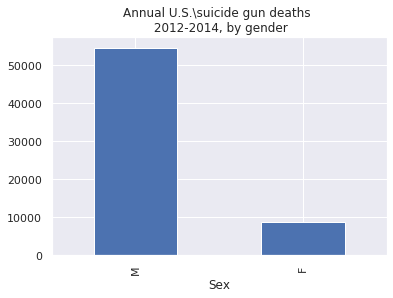

In [165]:
gunDeath_byGender.plot.bar(title='Annual U.S.\\suicide gun deaths \n 2012-2014, by gender')
plt.xlabel('Sex')

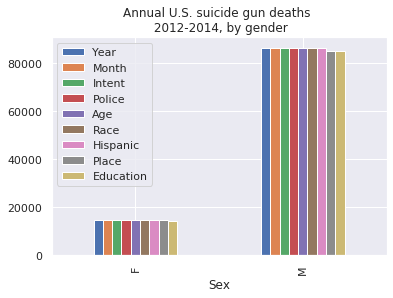

In [166]:
data_byGender.plot.bar(title='Annual U.S. suicide gun deaths \n 2012-2014, by gender')

### Q2. What is the number of gun deaths by race in the United States per 100,000 people from 2012 to 2014?

In [167]:
#death_byRace = dataset.groupby('Race')
#death_byRace['Race'].count()*100/100000
dataset_byRace = dataset
(dataset_byRace.Race.value_counts(ascending=False)*100/100000)

White                             66.237
Black                             23.296
Hispanic                           9.022
Asian/Pacific Islander             1.326
Native American/Native Alaskan     0.917
Name: Race, dtype: float64

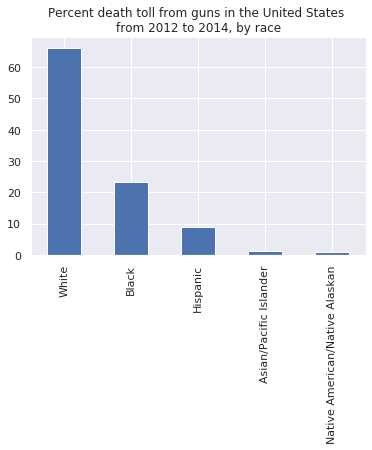

In [168]:
(dataset_byRace.Race.value_counts(ascending=False)*100/100000).plot.bar( title='Percent death toll from guns in the United States \nfrom 2012 to 2014, by race')

### Q3 What is the number of gun deaths in the United States on average from 2012 to 2014, by cause?

In [169]:
dataset_byRace['Intent'].value_counts(sort=True, ascending=False)

Suicide         63175
Homicide        35176
Accidental       1639
Undetermined      807
Name: Intent, dtype: int64

Text(0.5, 0, 'Causes')

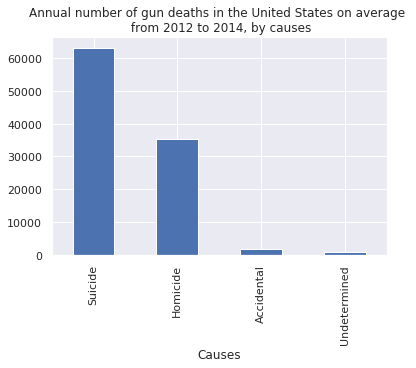

In [170]:
dataset_byRace['Intent'].value_counts(sort=True, ascending=False).plot.bar(title = 'Annual number of gun deaths in the United States on average \n from 2012 to 2014, by causes')
plt.xlabel('Causes')

In [171]:
dataset.groupby('Intent').mean()

,Year,Month,Police,Age,Hispanic
Intent,,,,,
Accidental,2013.023185,6.761440,0.000000,38.043346,114.102502
Homicide,2012.980555,6.687031,0.039857,32.620212,122.787241
Suicide,2013.010574,6.497032,0.000000,50.310917,109.342002
Undetermined,2013.017348,6.495663,0.000000,40.238213,117.864932


### Q4 What is the percentage per 100,000 people of annual gun deaths in the United States from 2012 to 2014, by cause?

In [172]:
dataset_byRace['Intent'].value_counts(ascending=False)*100/100000

Suicide         63.175
Homicide        35.176
Accidental       1.639
Undetermined     0.807
Name: Intent, dtype: float64

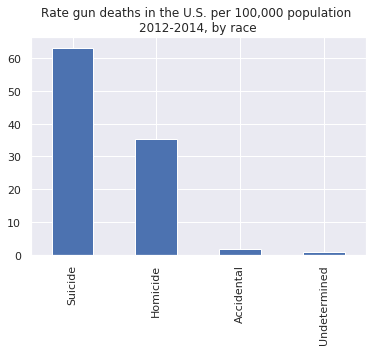

In [173]:
(dataset_byRace.Intent.value_counts(ascending=False)
*100/100000).plot.bar(title='Rate gun deaths in the U.S. per 100,000 population \n2012-2014, by race')

### Q5 What is the percentage of suicide gun deaths in the United States from 2012 to 2014, by year?

In [174]:
dataset_suicide = dataset[ dataset["Intent"]=="Suicide"]
datasetSuicide= dataset_suicide.Year.value_counts(ascending=False) *100/100000
datasetSuicide.sort_values(ascending=True)

2012    20.666
2013    21.175
2014    21.334
Name: Year, dtype: float64

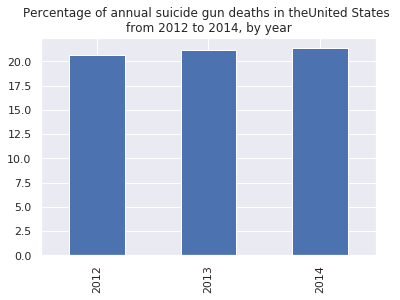

In [175]:
datasetSuicide.sort_values(ascending=True).plot.bar(title='Percentage of annual suicide gun deaths in theUnited States \nfrom 2012 to 2014, by year')

# Findings

1. Male suicide gun deaths is over50,000, while females suicide gundeaths is below 10,000, which showshow        males are more likely to commit suicide with a gun.
2. The highest number of deaths is for white people, then black, and then Hispanic.
3. There is a high number of suicide and homicide deaths compared to a low number of deaths due to accidents.
4. The 100,000 percentages shows that there are 60 suicide cases for every 100,000 people, which somehow is      not a high rate. In addition, there are 30 homicide cases for every 100,000 people.
5. The analysis shows almost the same number of suicides each year over a period of three years, which means      that this is a regular pattern in society.